Why do we do statistical inference?
- To draw probabilistic conclusions about what we might expect if we collected the same data again.
- To draw actionable conclusions from data.
- To draw more general conclusions from relatively few data or observations.

Why probability?
- Probability provides a measure of uncertainty.
- Data are almost never exactly the same when acquired again, and probability allows us to say how much we expect them to vary.

- Seed the random number generator using the seed 42.
- Initialize an empty array, random_numbers, of 100,000 entries to store the random numbers. Make sure you use np.empty(100000) to do this.
- Write a for loop to draw 100,000 random numbers using np.random.random(), storing them in the random_numbers array. To do so, loop over range(100000).
- Plot a histogram of random_numbers. It is not necessary to label the axes in this case because we are just checking the random number generator. Hit submit to show your plot.

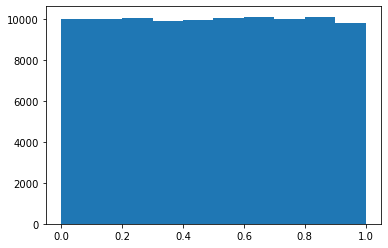

In [2]:
import numpy as np
import matplotlib.pyplot as plt
# Seed the random number generator
np.random.seed(42)

# Initialize random numbers: random_numbers
random_numbers = np.empty(100000)

# Generate random numbers by looping over range(100000)
for i in range(100000):
    random_numbers[i] = np.random.random()

# Plot a histogram
_ = plt.hist(random_numbers)

# Show the plot
plt.show()


- Define a function with signature perform_bernoulli_trials(n, p).
- Initialize to zero a variable n_success the counter of Trues, which are Bernoulli trial successes.
- Write a for loop where you perform a Bernoulli trial in each iteration and increment the number of success if the result is True. Perform n iterations by looping over range(n).
- To perform a Bernoulli trial, choose a random number between zero and one using np.random.random(). If the number you chose is less than p, increment n_success (use the += 1 operator to achieve this).
- The function returns the number of successes n_success.

In [3]:
def perform_bernoulli_trials(n, p):
    """Perform n Bernoulli trials with success probability p
    and return number of successes."""
    # Initialize number of successes: n_success
    n_success = 0

    # Perform trials
    for i in range(n):
        # Choose random number between zero and one: random_number
        random_number = np.random.random()

        # If less than p, it's a success so add one to n_success
        if random_number < p:
            n_success = n_success + 1

    return n_success

- Seed the random number generator to 42.
- Initialize n_defaults, an empty array, using np.empty(). It should contain 1000 entries, since we are doing 1000 simulations.
- Write a for loop with 1000 iterations to compute the number of defaults per 100 loans using the perform_bernoulli_trials() function. It accepts two arguments: the number of trials n - in this case 100 - and the probability of success p - in this case the probability of a default, which is 0.05. On each iteration of the loop store the result in an entry of n_defaults.
- Plot a histogram of n_defaults. Include the normed=True keyword argument so that the height of the bars of the histogram indicate the probability.
- Show your plot.

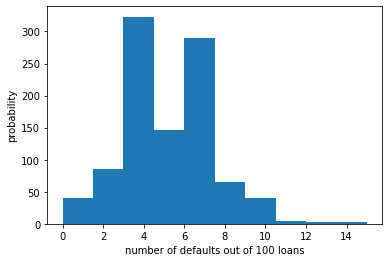

In [5]:
# Seed random number generator
np.random.seed(42)

# Initialize the number of defaults: n_defaults
n_defaults = np.empty(1000)

# Compute the number of defaults
for i in range(1000):
    n_defaults[i] = perform_bernoulli_trials(100, 0.05)


# Plot the histogram with default number of bins; label your axes
_ = plt.hist(n_defaults)
_ = plt.xlabel('number of defaults out of 100 loans')
_ = plt.ylabel('probability')

# Show the plot
plt.show()

- Compute the x and y values for the ECDF of n_defaults.
- Plot the ECDF, making sure to label the axes. Remember to include marker = '.' and linestyle = 'none' in addition to x and y in your call plt.plot().
- Show the plot.
- Compute the total number of entries in your n_defaults array that were greater than or equal to 10. To do so, compute a boolean array that tells you whether a given entry of n_defaults is >= 10. Then sum all the entries in this array using np.sum(). For example, np.sum(n_defaults <= 5) would compute the number of defaults with 5 or fewer defaults.
- The probability that the bank loses money is the fraction of n_defaults that are greater than or equal to 10. Print this result by hitting submit!

In [6]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y


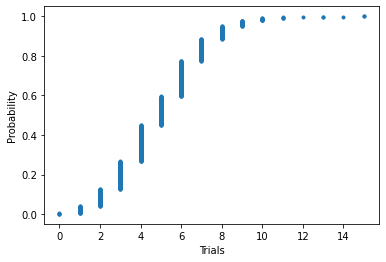

Probability of losing money = 0.022


In [7]:
# Compute ECDF: x, y
x, y = ecdf(n_defaults)

# Plot the ECDF with labeled axes
_ = plt.plot(x, y, marker = '.' , linestyle = 'none')
plt.xlabel("Trials")
plt.ylabel("Probability")

# Show the plot
plt.show()

# Compute the number of 100-loan simulations with 10 or more defaults: n_lose_money
n_lose_money = np.sum(n_defaults >= 10)

# Compute and print probability of losing money
print('Probability of losing money =', n_lose_money / len(n_defaults))


- Draw samples out of the Binomial distribution using np.random.binomial(). You should use parameters n = 100 and p = 0.05, and set the size keyword argument to 10000.
- Compute the CDF using your previously-written ecdf() function.
- Plot the CDF with axis labels. The x-axis here is the number of defaults out of 100 loans, while the y-axis is the CDF.
- Show the plot.

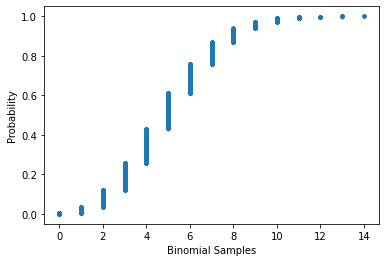

In [9]:
# Take 10,000 samples out of the binomial distribution: n_defaults
n_defaults = np.random.binomial(100, 0.05, size = 10000)

# Compute CDF: x, y
x, y = ecdf(n_defaults)

# Plot the CDF with axis labels
_ = plt.plot(x,y, marker= '.', linestyle = 'none')
plt.xlabel("Binomial Samples")
plt.ylabel("Probability")

# Show the plot
plt.show()


- Using np.arange(), compute the bin edges such that the bins are centered on the integers. Store the resulting array in the variable bins.
- Use plt.hist() to plot the histogram of n_defaults with the normed=True and bins=bins keyword arguments.
- Show the plot.

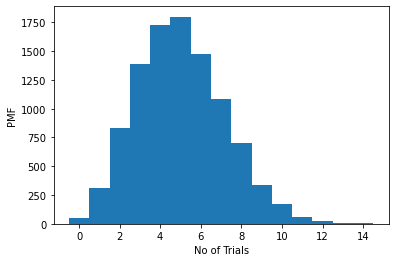

In [12]:
# Compute bin edges: bins
bins = np.arange(0, max(n_defaults) + 1.5) - 0.5

# Generate histogram
_ = plt.hist(n_defaults , bins=bins)

# Label axes
plt.xlabel("No of Trials")
plt.ylabel("PMF")

# Show the plot
plt.show()

- Using the np.random.poisson() function, draw 10000 samples from a Poisson distribution with a mean of 10.
- Make a list of the n and p values to consider for the Binomial distribution. Choose n = [20, 100, 1000] and p = [0.5, 0.1, 0.01] so that  is always 10.
- Using np.random.binomial() inside the provided for loop, draw 10000 samples from a Binomial distribution with each n, p pair and print the mean and standard deviation of the samples. There are 3 n, p pairs: 20, 0.5, 100, 0.1, and 1000, 0.01. These can be accessed inside the loop as n[i], p[i].

In [13]:
# Draw 10,000 samples out of Poisson distribution: samples_poisson
samples_poisson = np.random.poisson(10, size= 10000)

# Print the mean and standard deviation
print('Poisson:     ', np.mean(samples_poisson),
                       np.std(samples_poisson))

# Specify values of n and p to consider for Binomial: n, p
n = [20, 100, 1000]
p = [0.5, 0.1, 0.01]

# Draw 10,000 samples for each n,p pair: samples_binomial
for i in range(3):
    samples_binomial = np.random.binomial(n[i], p[i], size = 10000)

    # Print results
    print('n =', n[i], 'Binom:', np.mean(samples_binomial),
                                 np.std(samples_binomial))


Poisson:      9.9872 3.1772686634907035
n = 20 Binom: 10.0244 2.226612817712141
n = 100 Binom: 10.0187 2.991713607616879
n = 1000 Binom: 9.9894 3.145931919161634


When we have rare events (low p, high n), the Binomial distribution is Poisson. This has a single parameter, the mean number of successes per time interval

- Draw 10000 samples from a Poisson distribution with a mean of 251/115 and assign to n_nohitters.
- Determine how many of your samples had a result greater than or equal to 7 and assign to n_large.
- Compute the probability, p_large, of having 7 or more no-hitters by dividing n_large by the total number of samples (10000).
- Hit submit to print the probability that you calculated.

In [14]:
# Draw 10,000 samples out of Poisson distribution: n_nohitters
n_nohitters = np.random.poisson(251/115, size =  10000)

# Compute number of samples that are seven or greater: n_large
n_large = np.sum(n_nohitters >= 7)

# Compute probability of getting seven or more: p_large
p_large = n_large / len(n_nohitters)

# Print the result
print('Probability of seven or more no-hitters:', p_large)


Probability of seven or more no-hitters: 0.0068
